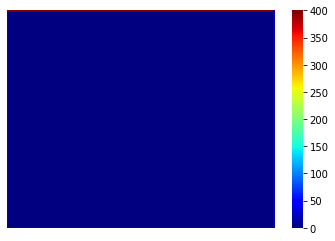

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML

# parameter
panjang = 2
lebar = 2
max_iter = 10
a = 5
dx = 0.01
dt = (dx ** 2)/(4 * a)
cons = (a * dt) / (dx ** 2)

# ini nanti berguna untuk menentukan banyak kolom dan baris hasil
P = int(round(panjang / dx, 1)) + 1
L = int(round(lebar / dx, 1)) + 1

# array yang nilainya nol
T = np.zeros((max_iter, P, L))

# suhu awal 
T0 = 0
T.fill(T0)

# suhu di batas-batas
T_atas = 400
T_kiri = 20
T_bawah = 20
T_kanan = 20
T[:, (P-1), :] = T_atas
T[:, :, (L-1)] = T_kanan
T[:, 0, :] = T_bawah
T[:, :, 0] = T_kiri

# finite difference method
def fdm(T):
  for k in range(0, max_iter-1):
    for i in range(1, P-1):
      for j in range(1, L-1):
        T[k + 1, i, j] = cons * (T[k][i+1][j] + T[k][i-1][j] + T[k][i][j+1] + T[k][i][j-1] - 4*T[k][i][j]) + T[k][i][j]
  return T

def plot(T_k, k):
    plt.clf()
    ax = sns.heatmap(T_k, yticklabels=False, xticklabels=False, cmap="jet")
    ax.invert_yaxis()
    return plt

z = fdm(T)

def animate(k):
    plot(z[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter)
HTML(anim.to_html5_video())

Original code is here. I just changed few for my intention. 

Nervadof, G. 2020. Solving 2D Heat Equation Numerically using Python.
https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a